In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/us-international-air-traffic-data/International_Report_Departures.csv
/kaggle/input/us-international-air-traffic-data/International_Report_Passengers.csv


### 1: Reading the International Report Departure data into a dataframe, and a quick scanning of the data

In [2]:
# Reading the dataset 
df = pd.read_csv('/kaggle/input/us-international-air-traffic-data/International_Report_Departures.csv')

In [30]:
# Looking in the first 10 rows 
df.head(10)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
5,10/01/2007,2007,10,14761,SFB,33,11928,GLA,493,20444,JN,0,Departures,0,8,8
6,02/01/2002,2002,2,14100,PHL,23,11032,CUN,148,20402,MMQ,1,Departures,0,1,1
7,02/01/2008,2008,2,16091,YIP,43,16166,YQG,936,20201,AMQ,1,Departures,0,3,3
8,11/01/2001,2001,11,13930,ORD,41,16042,YEG,916,19531,AC,0,Departures,0,1,1
9,07/01/2003,2003,7,13198,MCI,64,13514,MTY,148,20201,AMQ,1,Departures,0,1,1


In [4]:
# The shape of the dataframe
df.shape

(930808, 16)

In [5]:
# More info about dataframe; the columns data type, and null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 113.6+ MB


In [6]:
# is the dataframe contains a duplicated values:
df.duplicated().sum()

0

In [7]:
# Looking for null values
df.isnull().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

##### Only carrier column contains null values

In [8]:
# Statistical description
df.describe()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000
mean,2006.021361,6.414783,12809.473781,42.511740,13484.676238,466.910479,20057.217505,0.599361,40.003181,2.005483,42.008665
std,8.558831,3.471070,2716.223845,27.571338,1932.601107,288.005971,479.071456,0.490028,60.948973,8.278403,60.340835
min,1990.000000,1.000000,10010.000000,1.000000,10119.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11868.000000,205.000000,19704.000000,0.000000,0.000000,0.000000,3.000000
50%,2007.000000,6.000000,12892.000000,33.000000,13408.000000,427.000000,19991.000000,1.000000,17.000000,0.000000,20.000000
75%,2014.000000,9.000000,13487.000000,72.000000,15084.000000,736.000000,20312.000000,1.000000,60.000000,1.000000,60.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,2019.000000,1092.000000,2019.000000


### EDA

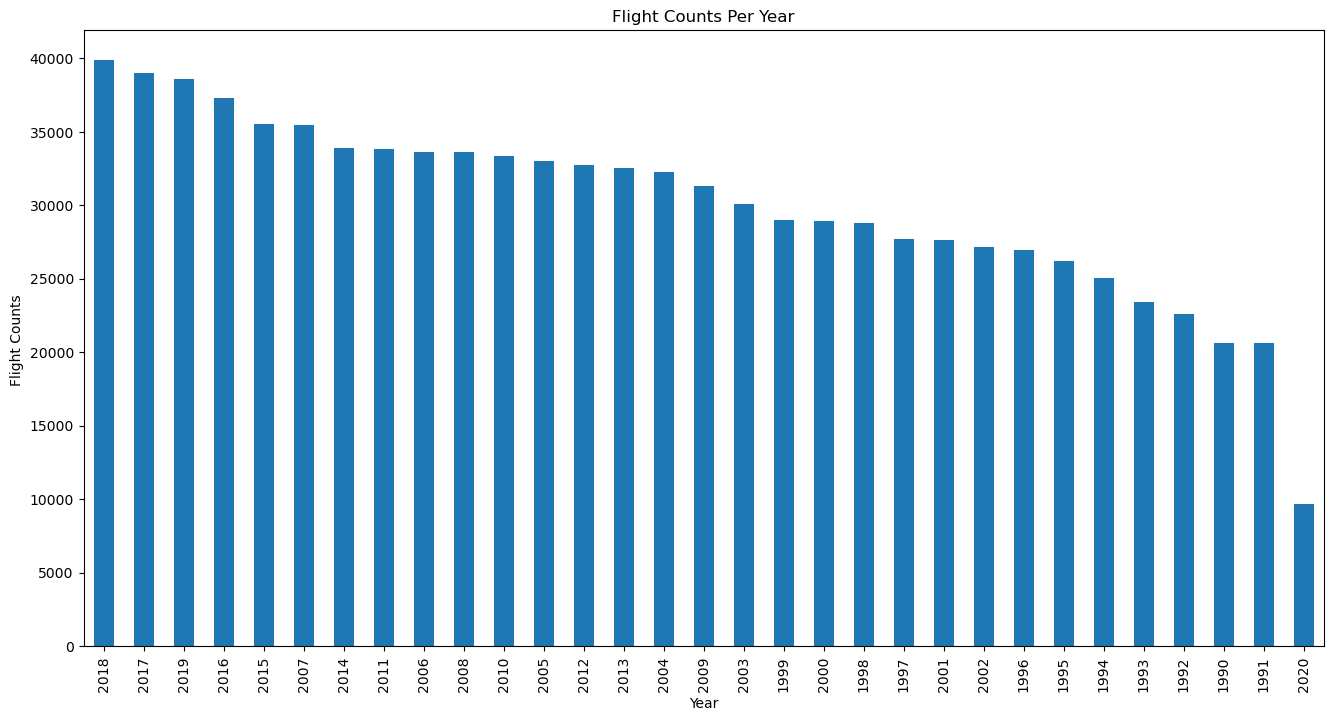

In [9]:
# Year Column
plt.figure(figsize = [16, 8])
df["Year"].value_counts().plot(kind="bar");
plt.xlabel("Year")
plt.ylabel("Flight Counts ")
plt.title("Flight Counts Per Year");

##### The best Year is 2018 while the 2020 is the worest due to corona pandamic

In [10]:
# US gateway Airport ID (usg_apt_id)
df["usg_apt_id"].nunique()

1015

In [11]:
# US gateway Airport 
df["usg_apt"].nunique()

1022

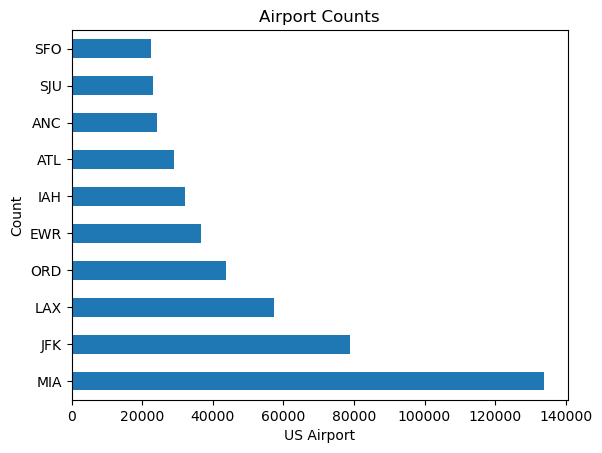

In [12]:
# Looking for the top 10 airports
df["usg_apt"].value_counts().head(10).plot(kind="barh");
plt.xlabel("US Airport")
plt.ylabel("Count")
plt.title("Airport Counts");

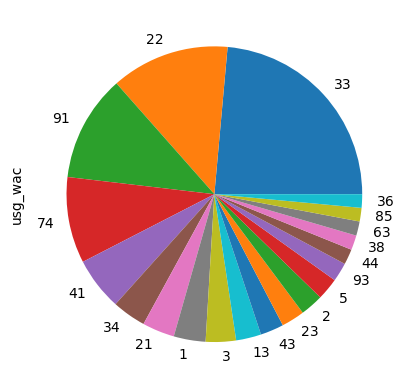

In [13]:
# USG WAC 

df["usg_wac"].value_counts().head(20).plot(kind="pie");

In [29]:
# fg gateway ID
df["fg_apt_id"].nunique()

1666

In [28]:
# fg gateway 
df["fg_apt"].nunique()

1669

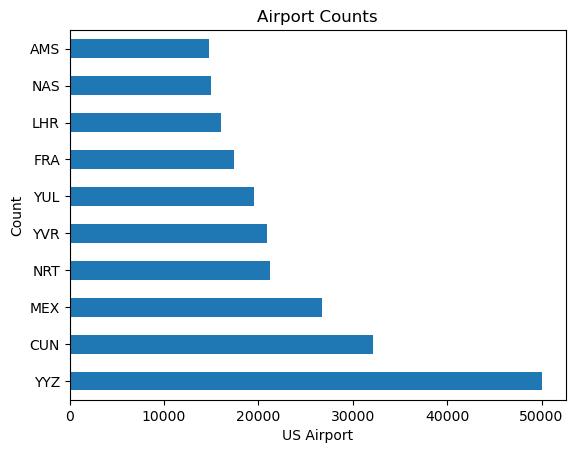

In [14]:
# Looking for the top 10 airports FG_APT
df["fg_apt"].value_counts().head(10).plot(kind="barh");
plt.xlabel("US Airport")
plt.ylabel("Count")
plt.title("Airport Counts");

In [15]:
df["fg_wac"].nunique()

229

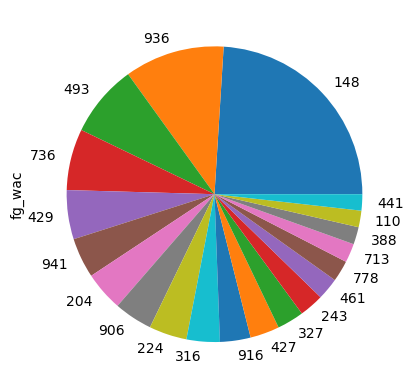

In [16]:
# FG WAC 

df["fg_wac"].value_counts().head(20).plot(kind="pie");

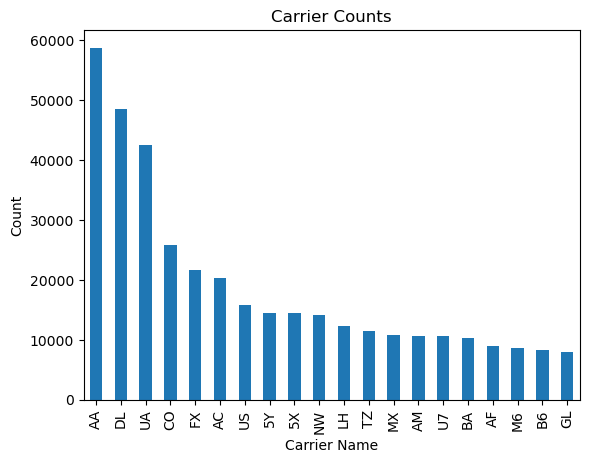

In [17]:
#Carrier

df["carrier"].value_counts().head(20).plot.bar()
plt.xlabel("Carrier Name")
plt.ylabel("Count")
plt.title("Carrier Counts");

In [39]:
#carriergroup

df["carriergroup"].nunique()

2

<Axes: ylabel='carriergroup'>

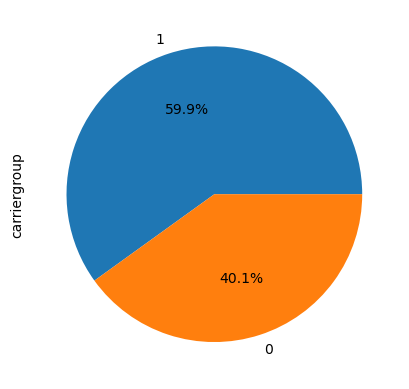

In [40]:
df['carriergroup'].value_counts().plot.pie(autopct='%1.1f%%')

In [25]:
# Scheduled & Charter 
scheduled_sum = df["Scheduled"].sum()
charter_sum = df["Charter"].sum()


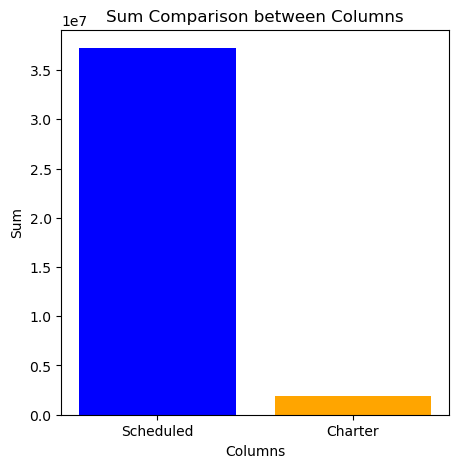

In [21]:
# Create a comparison DataFrame
comparison_data = {'Column': ['Scheduled', 'Charter'],
                   'Sum': [scheduled_sum, charter_sum]}
comparison_df = pd.DataFrame(comparison_data)

# Plot the comparison
plt.figure(figsize=(5, 5))
plt.bar(comparison_df['Column'], comparison_df['Sum'], color=['blue', 'orange'])
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Sum Comparison between Columns')
plt.show()

### 2: Reading the International Report Departure data into a dataframe, and a quick scanning of the data

In [22]:
# Reading the dataset 
df_2 = pd.read_csv('/kaggle/input/us-international-air-traffic-data/International_Report_Passengers.csv')

df_2.head(10)


,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76
5,03/01/2007,2007,3,14843,SJU,3,15084,SXM,259,20421,SLQ,1,Passengers,0,35,35
6,03/01/2001,2001,3,14986,SRQ,33,13252,MEX,148,19704,CO,1,Passengers,0,248,248
7,04/01/2007,2007,4,14027,PBI,33,11760,FRA,429,21186,0BQ,0,Passengers,0,2,2
8,09/01/2005,2005,9,10559,BFI,93,15999,YAZ,906,20345,RGQ,0,Passengers,0,8,8
9,08/01/2004,2004,8,10821,BWI,35,10150,ACC,529,20095,WO,1,Passengers,0,624,624


In [32]:
# Looking in the first 10 rows 
df_2.head(10)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76
5,03/01/2007,2007,3,14843,SJU,3,15084,SXM,259,20421,SLQ,1,Passengers,0,35,35
6,03/01/2001,2001,3,14986,SRQ,33,13252,MEX,148,19704,CO,1,Passengers,0,248,248
7,04/01/2007,2007,4,14027,PBI,33,11760,FRA,429,21186,0BQ,0,Passengers,0,2,2
8,09/01/2005,2005,9,10559,BFI,93,15999,YAZ,906,20345,RGQ,0,Passengers,0,8,8
9,08/01/2004,2004,8,10821,BWI,35,10150,ACC,529,20095,WO,1,Passengers,0,624,624


In [33]:
# The shape of the dataframe
df_2.shape

(680985, 16)

In [34]:
# More info about dataframe; the columns data type, and null values.
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680985 entries, 0 to 680984
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      680985 non-null  object
 1   Year          680985 non-null  int64 
 2   Month         680985 non-null  int64 
 3   usg_apt_id    680985 non-null  int64 
 4   usg_apt       680985 non-null  object
 5   usg_wac       680985 non-null  int64 
 6   fg_apt_id     680985 non-null  int64 
 7   fg_apt        680985 non-null  object
 8   fg_wac        680985 non-null  int64 
 9   airlineid     680985 non-null  int64 
 10  carrier       678188 non-null  object
 11  carriergroup  680985 non-null  int64 
 12  type          680985 non-null  object
 13  Scheduled     680985 non-null  int64 
 14  Charter       680985 non-null  int64 
 15  Total         680985 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 83.1+ MB


In [36]:
# is the dataframe contains a duplicated values:
df_2.duplicated().sum()

0

In [38]:
# Looking for null values
df_2.isnull().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [41]:
# Statistical description
df_2.describe()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000
mean,2006.141110,6.366576,12779.103825,44.394527,13493.331869,468.122264,20031.610461,0.562233,6478.893801,196.740288,6675.634089
std,8.716122,3.466745,2510.939346,28.110753,1955.917890,292.799407,510.270976,0.496112,8622.704655,954.759814,8532.400269
min,1990.000000,1.000000,10010.000000,1.000000,10125.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11760.000000,204.000000,19623.000000,0.000000,142.000000,0.000000,633.000000
50%,2007.000000,6.000000,12889.000000,33.000000,13408.000000,429.000000,19917.000000,1.000000,3561.000000,0.000000,3803.000000
75%,2014.000000,9.000000,13796.000000,74.000000,15092.000000,736.000000,20312.000000,1.000000,9700.000000,0.000000,9761.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,149898.000000,58284.000000,150195.000000


### EDA

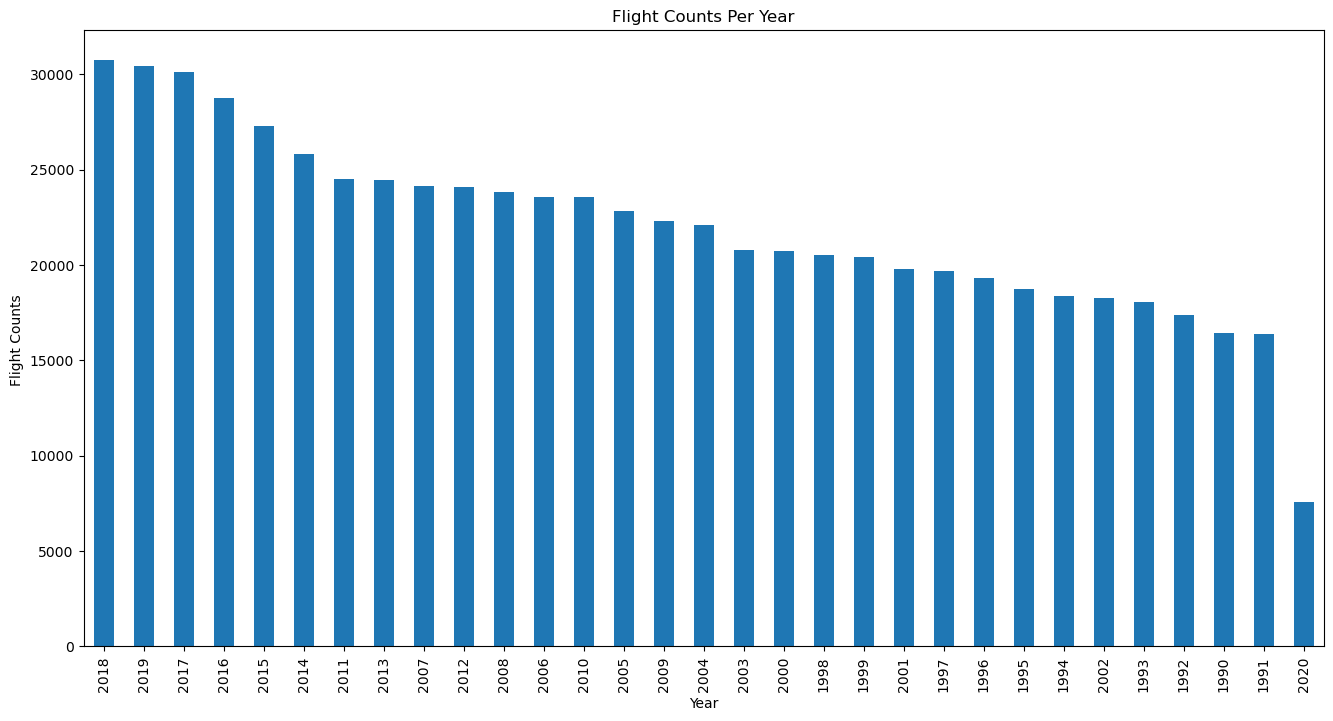

In [42]:
# Year Column
plt.figure(figsize = [16, 8])
df_2["Year"].value_counts().plot(kind="bar");
plt.xlabel("Year")
plt.ylabel("Flight Counts ")
plt.title("Flight Counts Per Year");

##### The best Year is 2018 while the 2020 is the worest due to corona pandamic

In [43]:
# US gateway Airport ID (usg_apt_id)
df_2["usg_apt_id"].nunique()

832

In [44]:
# US gateway Airport 
df_2["usg_apt"].nunique()

837

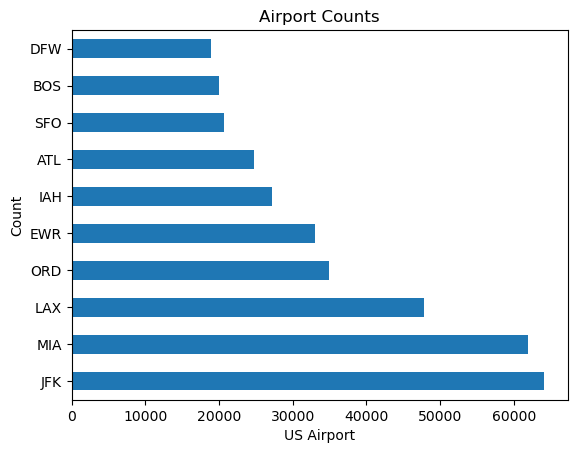

In [45]:
# Looking for the top 10 airports
df_2["usg_apt"].value_counts().head(10).plot(kind="barh");
plt.xlabel("US Airport")
plt.ylabel("Count")
plt.title("Airport Counts");

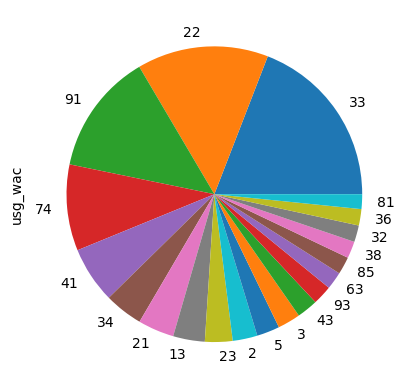

In [47]:
# USG WAC 

df_2["usg_wac"].value_counts().head(20).plot(kind="pie");

In [48]:
# fg gateway ID
df_2["fg_apt_id"].nunique()

1304

In [49]:
# fg gateway 
df_2["fg_apt"].nunique()

1304

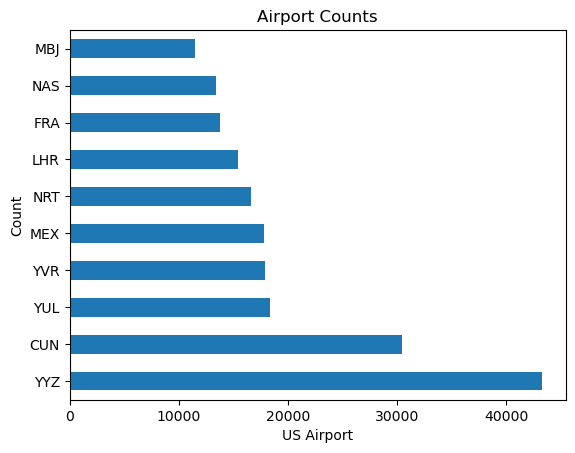

In [50]:
# Looking for the top 10 airports FG_APT
df_2["fg_apt"].value_counts().head(10).plot(kind="barh");
plt.xlabel("US Airport")
plt.ylabel("Count")
plt.title("Airport Counts");

In [51]:
df_2["fg_wac"].nunique()

208

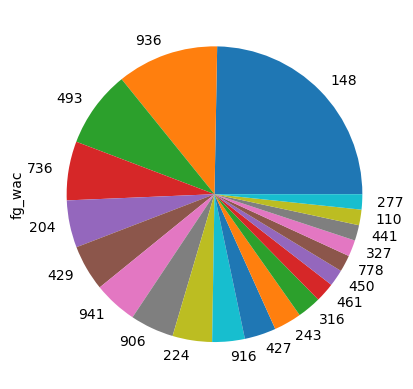

In [52]:
# FG WAC 

df_2["fg_wac"].value_counts().head(20).plot(kind="pie");

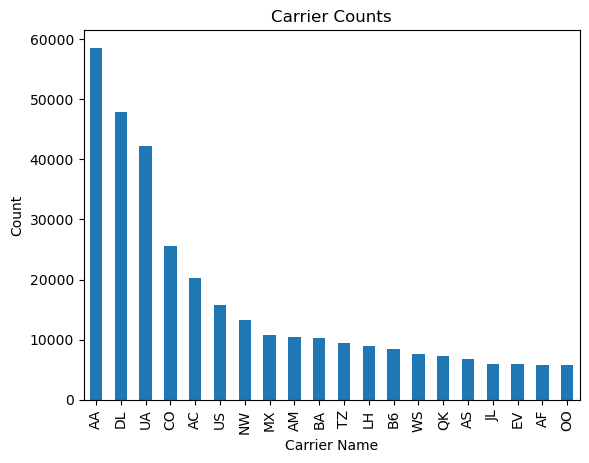

In [53]:
#Carrier

df_2["carrier"].value_counts().head(20).plot.bar()
plt.xlabel("Carrier Name")
plt.ylabel("Count")
plt.title("Carrier Counts");

In [54]:
#carriergroup

df_2["carriergroup"].nunique()

2

<Axes: ylabel='carriergroup'>

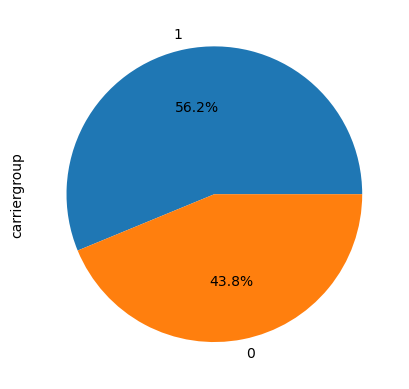

In [55]:
df_2['carriergroup'].value_counts().plot.pie(autopct='%1.1f%%')

In [56]:
# Scheduled & Charter 
scheduled_sum = df_2["Scheduled"].sum()
charter_sum = df_2["Charter"].sum()


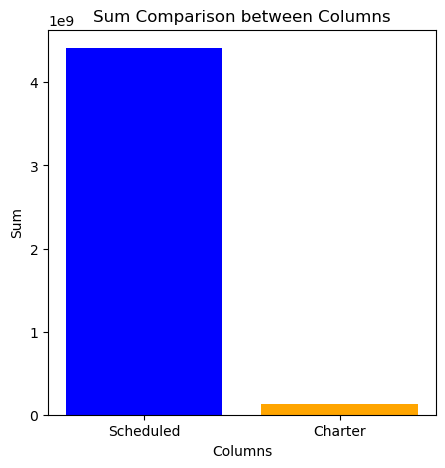

In [57]:
# Create a comparison DataFrame
comparison_data = {'Column': ['Scheduled', 'Charter'],
                   'Sum': [scheduled_sum, charter_sum]}
comparison_df = pd.DataFrame(comparison_data)

# Plot the comparison
plt.figure(figsize=(5, 5))
plt.bar(comparison_df['Column'], comparison_df['Sum'], color=['blue', 'orange'])
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Sum Comparison between Columns')
plt.show()